In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
import json

In [163]:
mapper = yaml.safe_load(open('plot_mapper.yml'))
models = yaml.safe_load(open('../score.yml'))['models']
lang_fam_map = mapper['lang_family_dict']
lang_list = list(lang_fam_map.keys())

model_name_map = mapper['model_name_dict']

ACCURACY_OE_PATH = '../json/{model}_accuracy_oe{oe_mode}.json'

In [164]:
d = []

for model in models:
    acc_oe_single = json.load(open(ACCURACY_OE_PATH.format(model=model, oe_mode='')))
    acc_oe_dual = json.load(open(ACCURACY_OE_PATH.format(model=model, oe_mode='_dual')))
    acc_oe_multi = json.load(open(ACCURACY_OE_PATH.format(model=model, oe_mode='_multi')))


    for task in ['1a. Dish Name (No-Context)', '1b. Dish Name (Contextualized)', '1c. Dish Name (Adversarial)', '2. Regional Cuisine']:
        d.append({
            'model': model,
            'task': task.split('.')[0],
            'acc_oe_single': acc_oe_single[task]['avg_score'],
            'acc_oe_dual': acc_oe_dual[task]['avg_score'],
            'acc_oe_multi': acc_oe_multi[task]['avg_score'],
        })

In [165]:
df = pd.DataFrame(d)
df['model'] = df['model'].map(model_name_map)
df

,model,task,acc_oe_single,acc_oe_dual,acc_oe_multi
0,Llava1.6 Vicuna 7B,1a,1.15,1.54,1.59
1,Llava1.6 Vicuna 7B,1b,2.83,3.77,4.03
2,Llava1.6 Vicuna 7B,1c,1.03,1.39,1.41
3,Llava1.6 Vicuna 7B,2,8.25,9.09,9.29
4,Llava1.6 Vicuna 13B,1a,2.04,2.51,2.79
...,...,...,...,...,...
63,GPT4o-mini,2,24.23,24.63,25.79
64,Gemini1.5 Flash,1a,12.81,15.37,17.09
65,Gemini1.5 Flash,1b,15.16,17.91,22.27
66,Gemini1.5 Flash,1c,6.46,7.71,8.71


In [174]:
df_model = df.groupby('model', sort=False).mean().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33284\1021409958.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model = df.groupby('model', sort=False).mean().reset_index()


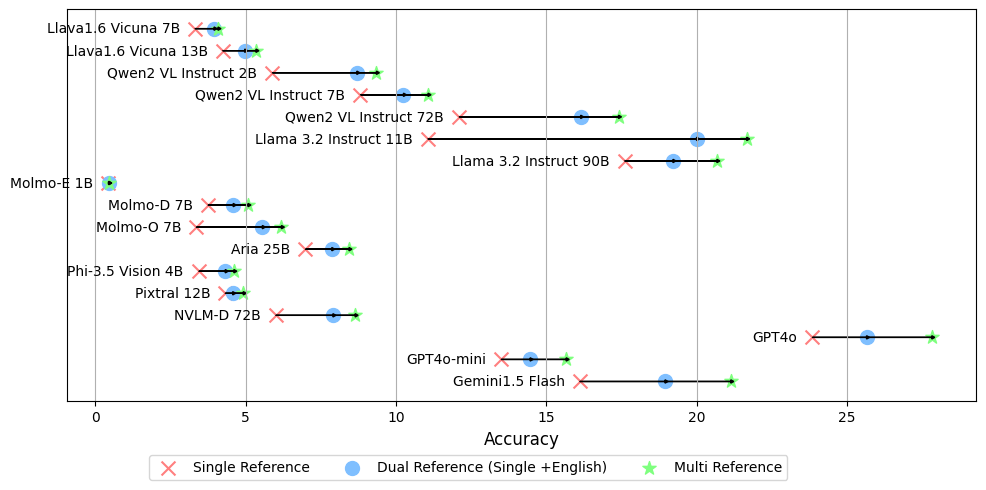

In [183]:
models = df_model['model'].to_list()[::-1]
single = df_model['acc_oe_single'].to_list()[::-1]
dual = df_model['acc_oe_dual'].to_list()[::-1]
multi = df_model['acc_oe_multi'].to_list()[::-1]

fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(single, models, color='#FF7F7F', marker='x', label='Single Reference', s=100)
ax.scatter(dual, models, color='#7FBFFF', marker='o', label='Dual Reference (Single +English)', s=100)
ax.scatter(multi, models, color='#7FFF7F', marker='*', label='Multi Reference', s=100)
for i in range(len(models)):
    ax.arrow(single[i], i, dual[i] - single[i], 0, head_width=0.15, head_length=0.1, fc='black', ec='black')
    ax.arrow(dual[i], i, multi[i] - dual[i], 0, head_width=0.15, head_length=0.1, fc='black', ec='black')

for i, model in enumerate(models):
    ax.text(single[i]-0.5, i, model, fontsize=10, ha='right', va='center')

ax.set_xlabel('Accuracy', fontsize=12)
plt.yticks([], visible=False) 
plt.legend(bbox_to_anchor=(0.8, -0.12), ncol=3)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [82]:
df_task = df.groupby('task').mean().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33284\2873070483.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_task = df.groupby('task').mean().reset_index()


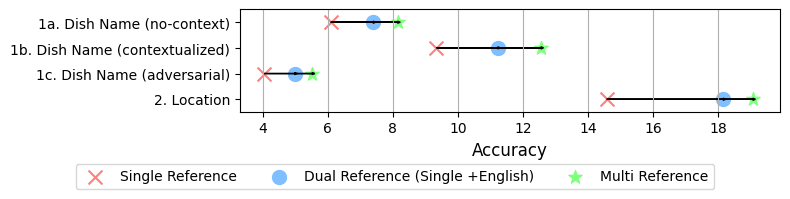

In [161]:
task = ['1a. Dish Name (no-context)', '1b. Dish Name (contextualized)', '1c. Dish Name (adversarial)', '2. Location'][::-1]
single = df_task['acc_oe_single'].to_list()[::-1]
dual = df_task['acc_oe_dual'].to_list()[::-1]
multi = df_task['acc_oe_multi'].to_list()[::-1]

fig, ax = plt.subplots(figsize=(8, 1.8))

ax.scatter(single, task, color='#FF7F7F', marker='x', label='Single Reference', s=100)
ax.scatter(dual, task, color='#7FBFFF', marker='o', label='Dual Reference (Single +English)', s=100)
ax.scatter(multi, task, color='#7FFF7F', marker='*', label='Multi Reference', s=100)
for i in range(len(task)):
    ax.arrow(single[i], i, dual[i] - single[i], 0, head_width=0.08, head_length=0.08, fc='black', ec='black')
    ax.arrow(dual[i], i, multi[i] - dual[i], 0, head_width=0.08, head_length=0.08, fc='black', ec='black')

ax.set_xlabel('Accuracy', fontsize=12)
ax.set_ylim(-0.5, len(task) - 0.5)
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.12), ncol=3)
plt.grid(axis='x')
plt.tight_layout()
plt.show()